<a href="https://colab.research.google.com/github/satishchaudhary382/RFM/blob/master/Ichimoku.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("/content/shivam.txt",sep = "\t",parse_dates= ['Date'])

In [36]:
from ta.trend import MACD
m = MACD(df.Close)
df['MACD'] = m.macd()
df['MACD_signal'] = m.macd_signal()
df['MACD_diff'] = m.macd_diff()
from ta.volume import MFIIndicator
mf = MFIIndicator(df.High, df.Low,df.Close, 14)
df['MFI'] = mf.money_flow_index()

No handles with labels found to put in legend.


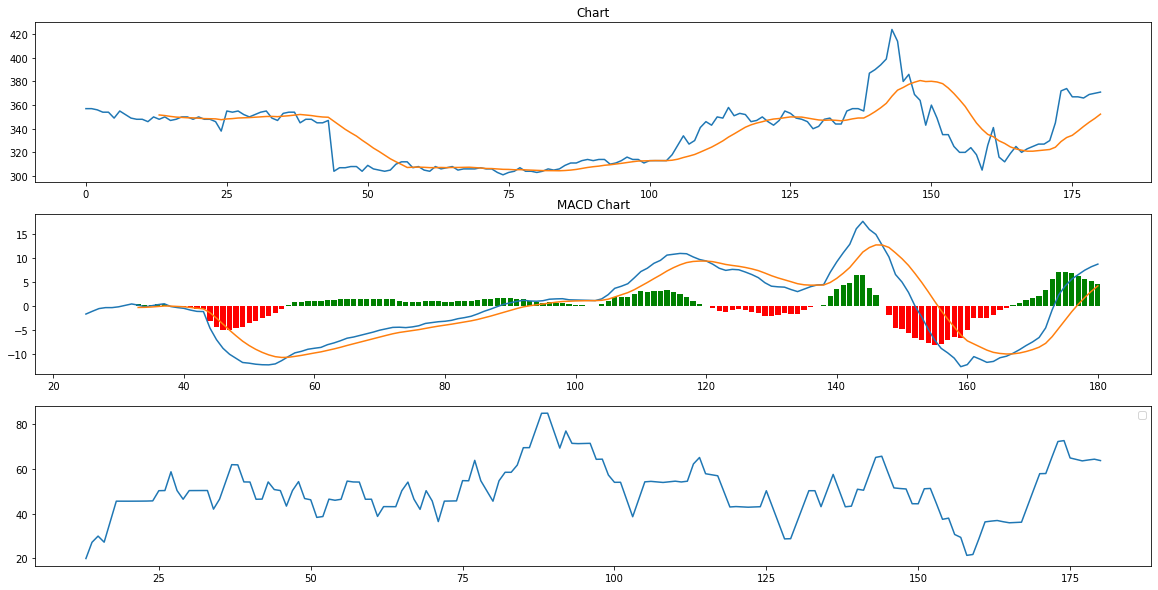

In [37]:
fig, axs = plt.subplots(3,figsize = (20,10))
axs[0].plot(df.Close, label = 'Price')
axs[0].plot(df.Close.rolling(14).mean())
axs[0].set_title("Chart")
axs[1].set_title("MACD Chart")
axs[1].plot(df.MACD, label = 'MACD')
axs[1].plot(df.MACD_signal, label = 'Signal line')
axs[1].bar(df.MACD_diff[df.MACD_diff>0].index, df.MACD_diff[df.MACD_diff>0], color = 'green')
axs[1].bar(df.MACD_diff[df.MACD_diff<0].index, df.MACD_diff[df.MACD_diff<0], color = 'red')
axs[2].plot(df.MFI)
plt.legend()

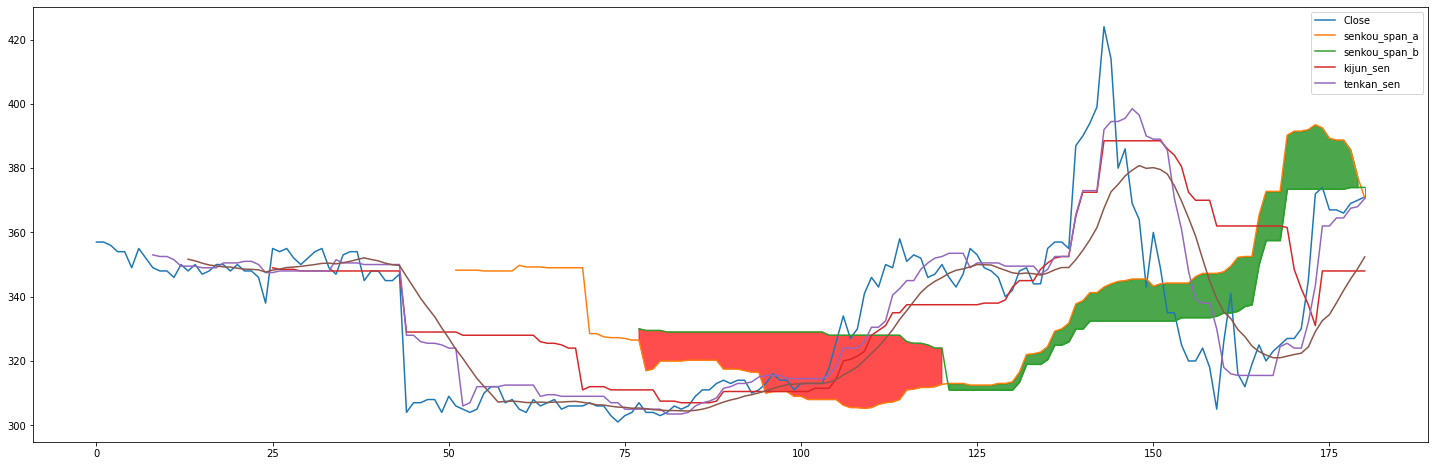

In [22]:
# Tenkan-sen (Conversion Line): (9-period high + 9-period low)/2))
nine_period_high = df['High'].rolling(window= 9).max()
nine_period_low = df['Low'].rolling(window= 9).min()
df['tenkan_sen'] = (nine_period_high + nine_period_low) /2
# Kijun-sen (Base Line): (26-period high + 26-period low)/2))
period26_high = df['High'].rolling(window=26).max()
period26_low = df['Low'].rolling(window=26).min()
df['kijun_sen'] = (period26_high + period26_low) / 2


# last_index = df.iloc[-1:].index[0]
# last_date = df['Date'].iloc[-1].date()
# for i in range(26):
#     df.loc[last_index+1 +i, 'Date'] = last_date + timedelta(days=i)

df['senkou_span_a'] = ((df['tenkan_sen'] + df['kijun_sen']) / 2).shift(26)

high_52 = df['High'].rolling(window= 52).max()
low_52 = df['Low'].rolling(window= 52).min()
df['senkou_span_b'] = ((high_52 + low_52) /2).shift(26)

# most charting softwares dont plot this line
df['chikou_span'] = df['Close'].shift(-22) #sometimes -26 

tmp = df[['Close','senkou_span_a','senkou_span_b','kijun_sen','tenkan_sen']].tail(300)
ma = df['Close'].rolling(window = 14).mean()
a1 = tmp.plot(figsize=(25,8))
a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b,where = tmp.senkou_span_a>tmp.senkou_span_b,color = "green",alpha = .7)
a1.fill_between(tmp.index, tmp.senkou_span_a, tmp.senkou_span_b,where = tmp.senkou_span_a<tmp.senkou_span_b,color = "red",alpha= .7)
a2 = ma.plot(figsize = (25,8))

